In [40]:
import pandas as pd
import numpy as np

In [41]:
data_file = 'MoviesOnStreamingPlatforms.csv'
raw_df = pd.read_csv(data_file)
raw_df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0.0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0.0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0.0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0.0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [42]:
# Checking the column names in order to know what all possible values can we use for analysis
raw_df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime'],
      dtype='object')

In [43]:
#To get some basic statistical details like percent, mean, std etc. of a data frame.
raw_df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212614,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409170,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.010000,1.000000,1.000000,1.000000,0.0,1256.000000


In [44]:
#prints a concise summary of a DataFrame.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  float64
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16130 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 2.0+ MB


In [45]:
#Checking how many null or missing values does the dataset have.
raw_df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             614
Runtime              592
dtype: int64

In [46]:
#copying the raw data frame for backup.
raw_df_copy = raw_df.copy()
raw_df_copy

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0.0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0.0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0.0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0.0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [47]:
#Data Cleaning Task 1: Age Column

raw_df["Age"] = raw_df["Age"].replace('all','13+')
raw_df["Age"] = raw_df["Age"].str.rstrip('+').astype('float')
raw_df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13.0,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18.0,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13.0,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7.0,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0.0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7.0,4.7,NaN,0.0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0.0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0.0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [48]:
#Data Cleaning Task 2: drop Rotten Tomato column.

new_df= raw_df.drop(['Rotten Tomatoes'], axis=1)
new_df

# Alternate option: Convert the percentage review to float data type.
# raw_df["Rotten Tomatoes"]= raw_df["Rotten Tomatoes"].str.rstrip('%').astype('float')

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13.0,8.8,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18.0,8.7,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13.0,8.5,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7.0,8.5,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0.0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7.0,4.7,0.0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,0.0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,0.0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [49]:
new_df.isnull().sum()

ID                0
Title             0
Year              0
Age            9390
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       726
Genres          275
Country         435
Language        614
Runtime         592
dtype: int64

In [50]:
new_df.Directors.fillna("Director Unavailable", inplace=True)
new_df.Language.fillna("Language Unavailable", inplace=True)
#new_df.Runtime.fillna("NaN", inplace=True)
new_df.Country.fillna("Country Unavailable", inplace=True)
new_df.IMDb.fillna("IMDb Rating Unavailable", inplace=True)
new_df.Genres.fillna("Genres Unavailable", inplace=True)

In [51]:
# Treating missing values of "Age" and "Runtime" column as 0.0
new_df['Age']= new_df['Age'].fillna(0)
new_df['Runtime']=new_df['Runtime'].fillna(0) 

In [52]:
new_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13.0,8.8,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18.0,8.7,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13.0,8.5,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7.0,8.5,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,0.0,6.2,0.0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7.0,4.7,0.0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,0.0,5.7,0.0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0
16742,16743,Man Among Cheetahs,2017,0.0,6.6,0.0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0


In [53]:
new_df.isnull().sum()

ID             0
Title          0
Year           0
Age            0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Type           0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

In [54]:
#lets begin by importing matplotlib.pyplot and seaborn

In [55]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
sns.color_palette("Set2")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [56]:
#COUNTRY

In [57]:
new_df.Country

0        United States,United Kingdom
1                       United States
2                       United States
3                       United States
4            Italy,Spain,West Germany
                     ...             
16739                   United States
16740                   United States
16741                   United States
16742                   United States
16743                   United States
Name: Country, Length: 16744, dtype: object

In [58]:
Countries_plot = new_df.set_index('Title').Country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
Countries_plot = Countries_plot[Countries_plot != 'Country Unavailable']
Countries_plot.value_counts()

United States                       10486
United Kingdom                       1713
India                                1157
Canada                               1117
France                                741
                                    ...  
The Democratic Republic Of Congo        1
Kosovo                                  1
East Germany                            1
Moldova                                 1
Botswana                                1
Name: count, Length: 168, dtype: int64

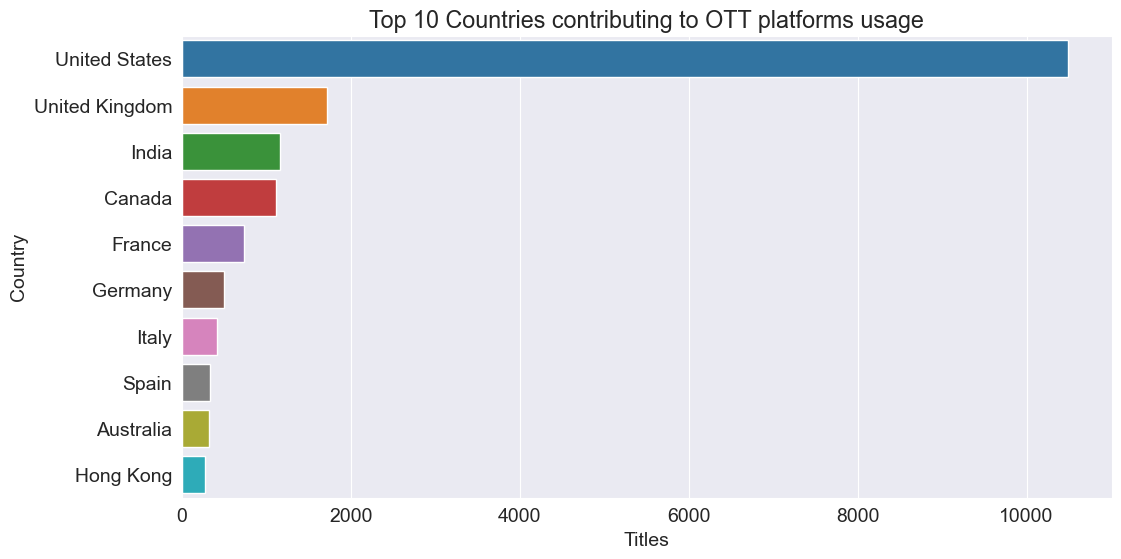

In [59]:
sns.countplot(y= Countries_plot,order= Countries_plot.value_counts().index[:10])
plt.title('Top 10 Countries contributing to OTT platforms usage')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [60]:
#AGE

In [61]:
new_df.Age

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     0.0
16740     7.0
16741     0.0
16742     0.0
16743     0.0
Name: Age, Length: 16744, dtype: float64

In [62]:
# Count based on Age category
new_df["Age"].value_counts()

Age
0.0     9390
18.0    3474
13.0    2098
7.0     1462
16.0     320
Name: count, dtype: int64

<BarContainer object of 4 artists>

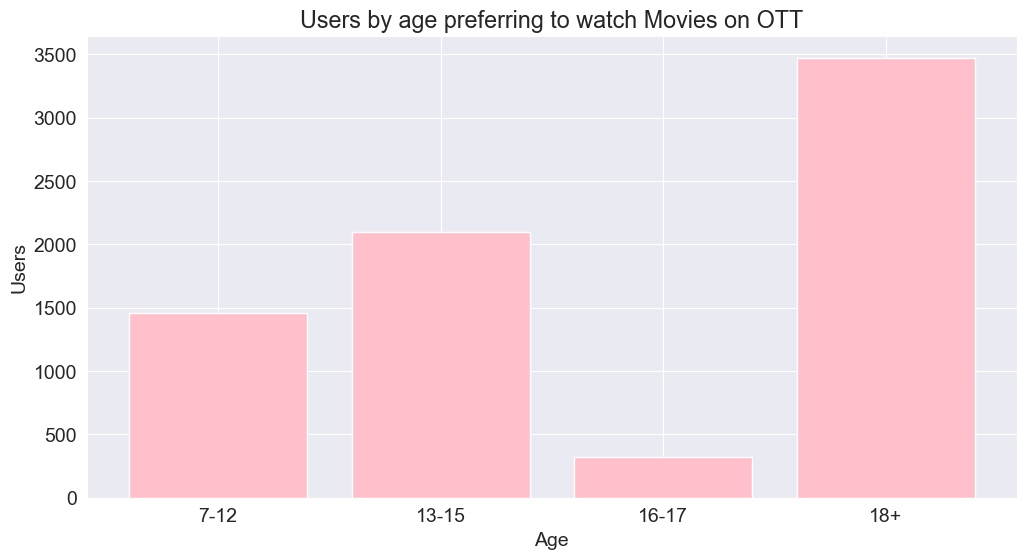

In [63]:
plt.title('Users by age preferring to watch Movies on OTT')
plt.xlabel('Age')
plt.ylabel('Users')

age_group= ['7-12', '13-15', '16-17', '18+']
values= [1462,2098,320,3474]

plt.bar(age_group, values, color="pink")

In [64]:
new_df.Directors

0                     Christopher Nolan
1        Lana Wachowski,Lilly Wachowski
2               Anthony Russo,Joe Russo
3                       Robert Zemeckis
4                          Sergio Leone
                      ...              
16739                      Bruce Bilson
16740                       Neal Israel
16741                      Neil Gelinas
16742              Richard Slater-Jones
16743                       James Algar
Name: Directors, Length: 16744, dtype: object

In [65]:
# Splitting the directors at "," if any.

dir_plt = new_df.set_index('Title').Directors.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
dir_plt = dir_plt[dir_plt != 'Director Unavailable']
dir_plt.value_counts()

Jay Chapman             36
Joseph Kane             31
Cheh Chang              29
Jim Wynorski            23
William Beaudine        23
                        ..
Laura Nix                1
Alan Polsky              1
Joe Manganiello          1
Pierre De Moro           1
Richard Slater-Jones     1
Name: count, Length: 12453, dtype: int64

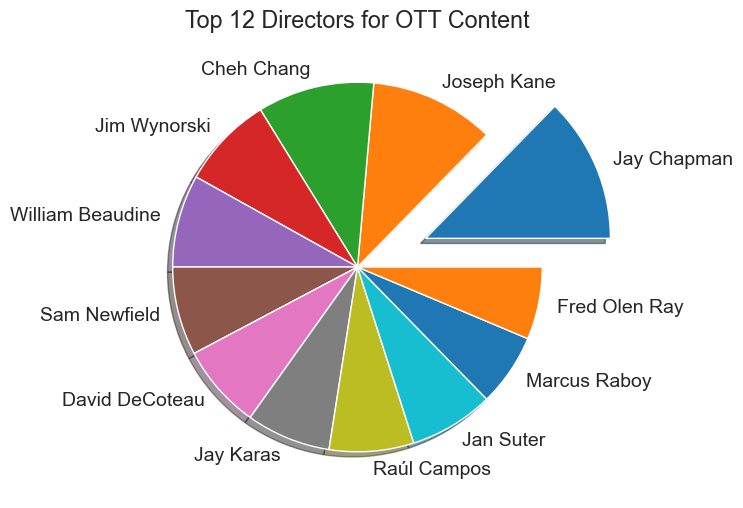

In [66]:
#Calculating the x and y values to plot pie chart

graph_values= np.array(dir_plt.value_counts().head(12))
graph_labels = np.array(dir_plt.value_counts().head(12).keys())
my_exp = [0.4,0,0,0,0,0, 0,0,0,0,0,0]

plt.pie(graph_values,labels = graph_labels,explode = my_exp, shadow =True)
plt.title("Top 12 Directors for OTT Content")
plt.show()

In [67]:
#YEAR

In [68]:
new_df.Year

0        2010
1        1999
2        2018
3        1985
4        1966
         ... 
16739    1980
16740    2001
16741    2013
16742    2017
16743    1950
Name: Year, Length: 16744, dtype: int64

In [69]:
# oldest and latest movie year
new_df['Year'].min()

1902

In [70]:
new_df['Year'].max()

2020

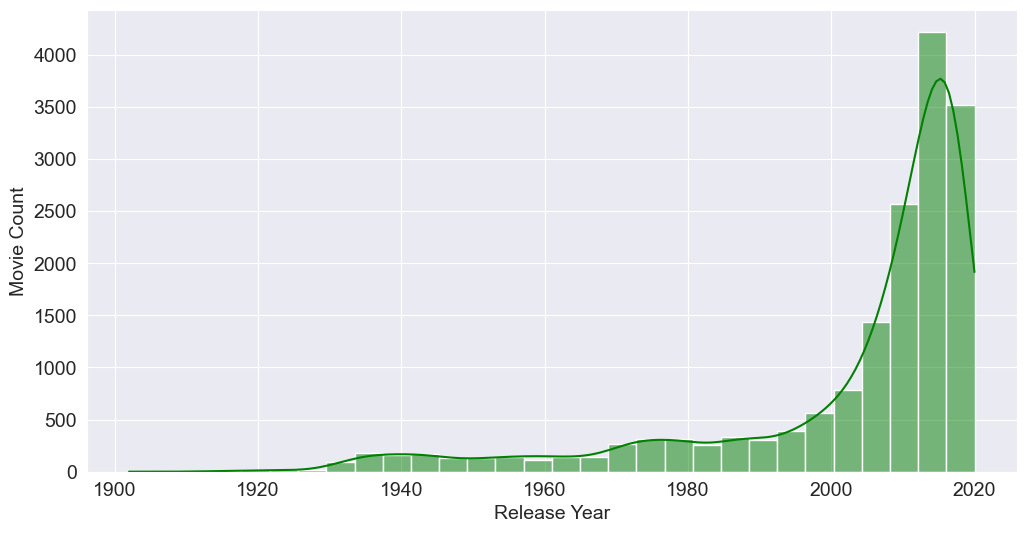

In [84]:
sns.histplot(x= new_df.Year, kde=True, color="Green", bins=30);
plt.xlabel('Release Year')
plt.ylabel('Movie Count');
plt.show()

In [72]:
new_df['Year'].value_counts().head(10)

Year
2017    1401
2018    1285
2016    1206
2015    1065
2014     986
2013     964
2012     843
2019     689
2011     645
2009     548
Name: count, dtype: int64

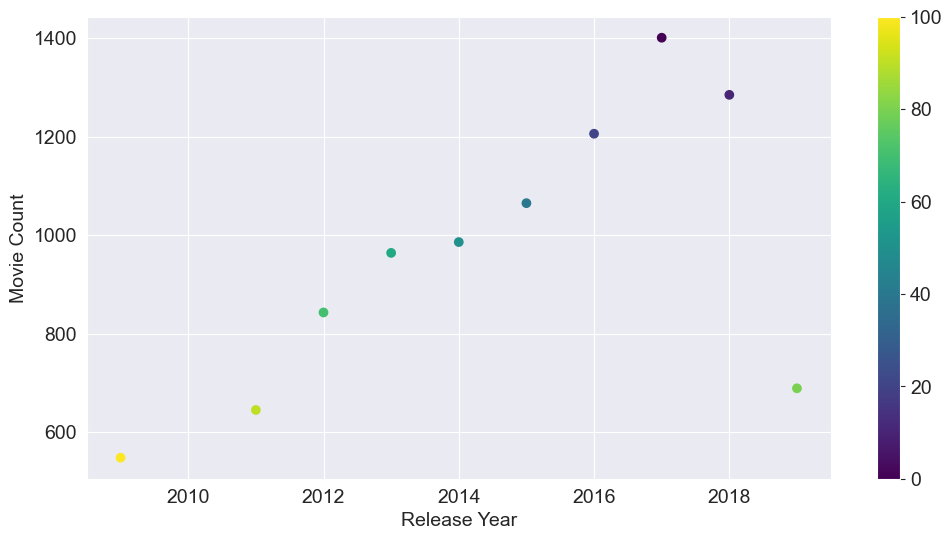

In [73]:
year= np.array([2017,2018,2016,2015,2014,2013,2012,2019,2011,2009])
count = np.array([1401,1285,1206,1065,986,964,843,689,645,548])
colors = np.array([0,10, 20, 40,  50, 60, 70, 80, 90, 100])

plt.scatter(year,count,c=colors,cmap="viridis")
plt.colorbar()
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.show()

In [74]:
#RUNTIME

In [75]:
new_df.Runtime

0        148.0
1        136.0
2        149.0
3        116.0
4        161.0
         ...  
16739    120.0
16740     90.0
16741      0.0
16742      0.0
16743     32.0
Name: Runtime, Length: 16744, dtype: float64

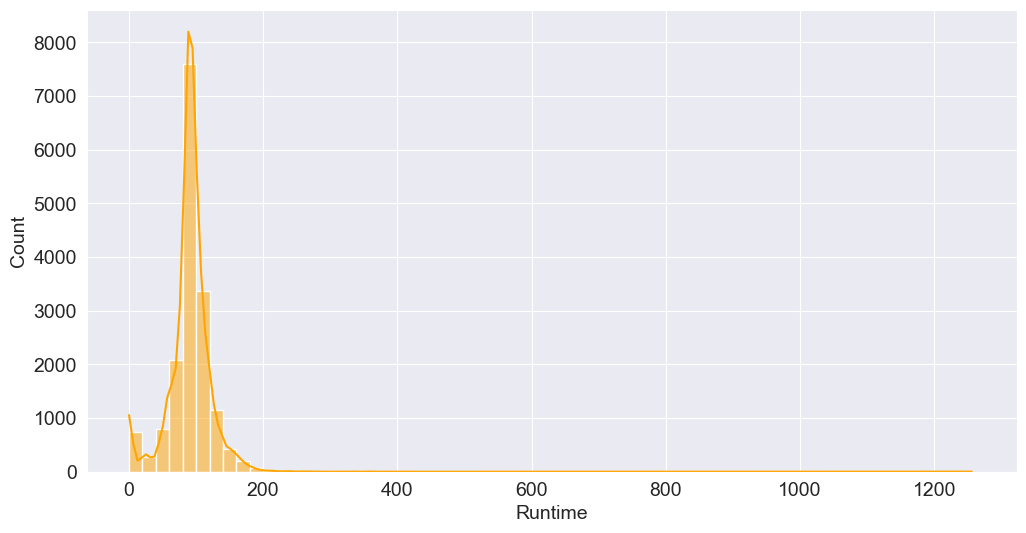

In [76]:
sns.histplot(x = new_df.Runtime, kde=True,color="orange", binwidth =20);

Top5_runtime =new_df["Runtime"].value_counts().head(5)

In [77]:
#Number of movies vs rating vs country

In [78]:
new_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13.0,8.8,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18.0,8.7,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13.0,8.5,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7.0,8.5,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,0.0,6.2,0.0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7.0,4.7,0.0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,0.0,5.7,0.0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0
16742,16743,Man Among Cheetahs,2017,0.0,6.6,0.0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0


In [79]:
# We can find the value_counts for each streaming services and then plot them for our analysis.
# For ex: 
new_df.Netflix.value_counts()

Netflix
0.00    13184
1.00     3559
1.01        1
Name: count, dtype: int64

In [80]:
new_df.Hulu.value_counts()

Hulu
0    15841
1      903
Name: count, dtype: int64

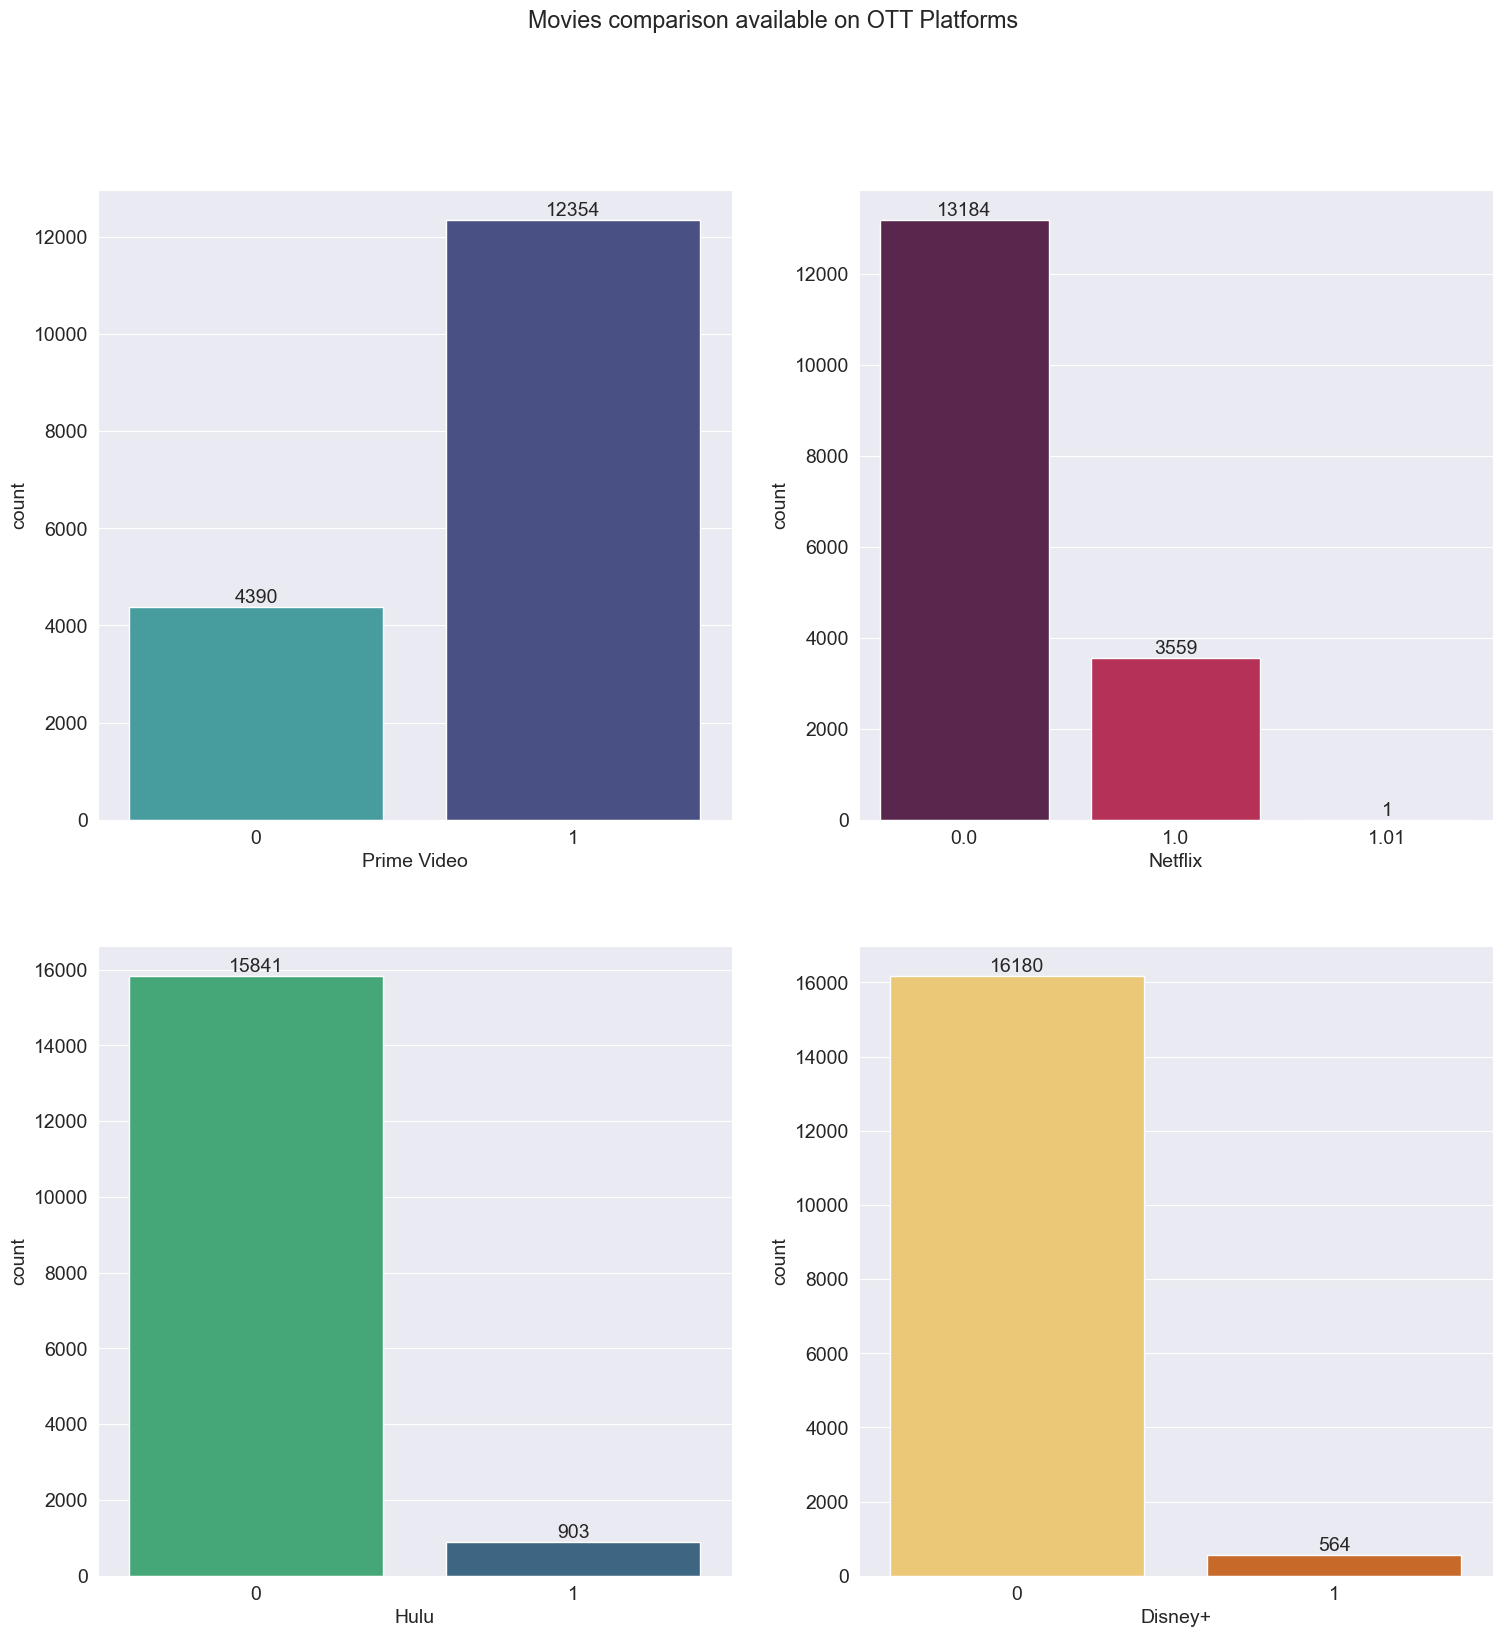

In [85]:
# Plotting all 4 platform data in subplots.

fig, axes = plt.subplots(2, 2, figsize=(18, 18))
fig.suptitle('Movies comparison available on OTT Platforms')
ax = sns.countplot(ax=axes[0, 0], x='Prime Video', data = new_df, palette="mako_r")
bx = sns.countplot(ax=axes[0, 1], x='Netflix', data = new_df, palette="rocket")
cx = sns.countplot(ax=axes[1, 0], x='Hulu', data = new_df, palette="viridis_r")
dx = sns.countplot(ax=axes[1, 1], x='Disney+', data = new_df, palette="YlOrBr")
# to add data labels to each bar in our plot
ax.bar_label(ax.containers[0])
bx.bar_label(bx.containers[0])
cx.bar_label(cx.containers[0])
dx.bar_label(dx.containers[0])

plt.show()